## ANÁLISE DE SOBREVIVÊNCIA
### Teoria e aplicações em saúde
#### Capítulo 2: O tempo na análise de sobrevivência
#### Exercícios Resolvidos
###### **Autor: Carlos Ed Beluzo - cbeluzo@gmail.com**

## Tópicos:

* [Importação de bibliotecas e leitura do arquivco CSV](#import)
* [Funções](#functions)
* [Exercício 2.1](#Exercicio2.1)
* [Exercício 2.2](#Exercicio2.2)
* [Exercício 2.3](#Exercicio2.3)


**Importação de bibliotecas e leitura do arquivco CSV** <a id='imports'></a>

In [1]:
import pandas as pd
import numpy as np
from lifelines.plotting import plot_lifetimes
import matplotlib.pyplot as plt

df = pd.read_csv('ipec.csv', sep=';').fillna('-1')
df.describe()


,id,ini,fim,tempo,status,idade,acompan,anotrat,tratam,doenca,propcp
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,2396.922280,3335.160622,938.238342,0.466321,36.554404,0.896373,1542.005181,1.098446,37.958549,2.948187
std,55.858452,1216.918778,1501.300776,770.741415,0.500162,9.508680,0.691946,835.230679,0.832696,44.700489,1.603190
min,1.000000,1.000000,96.000000,16.000000,0.000000,20.000000,0.000000,9.000000,0.000000,1.000000,0.000000
25%,49.000000,1406.000000,2095.000000,290.000000,0.000000,30.000000,0.000000,1990.000000,1.000000,3.000000,2.000000
50%,97.000000,2454.000000,3711.000000,852.000000,0.000000,35.000000,1.000000,1993.000000,1.000000,8.000000,4.000000
75%,145.000000,3314.000000,4790.000000,1348.000000,1.000000,43.000000,1.000000,1996.000000,2.000000,99.000000,4.000000
max,193.000000,4593.000000,4822.000000,3228.000000,1.000000,68.000000,2.000000,2000.000000,3.000000,99.000000,4.000000


**Funções**  <a id='functions'></a>

In [2]:
# Função que gera gráfico de tempo de sobrevivência
def linha_do_tempo(p_entry_individual, p_actual_lifetimes, p_current_time, p_censured, p_time_unit, p_person_type, p_title, p_width, p_height):
    observed_lifetimes = np.minimum(p_actual_lifetimes, p_current_time)
    death_observed = p_actual_lifetimes < p_current_time

    fig = plt.figure(figsize=(p_width,p_height))
    ax = plot_lifetimes(durations = observed_lifetimes,
                        event_observed = death_observed,
                        entry = p_entry_individual,
                        left_truncated = True,
                        sort_by_duration = False,
                        event_observed_color = "black",
                        event_censored_color = "r",
                       )

    ax.vlines(p_current_time, 0, len(p_actual_lifetimes), lw=1, linestyles='--')
    ax.set_xlim(-0.5, max(p_actual_lifetimes)+1)
    ax.set_xticks(np.array(range(0,max(p_actual_lifetimes)+1)))
    ax.set_yticks(np.array(range(0,len(p_actual_lifetimes))))
    ax.set_xlabel(p_time_unit, fontsize=12)
    ax.set_ylabel(p_person_type, fontsize=12)
    ax.set_title(p_title, fontsize=16)
    
    ax.set_yticklabels(np.array(range(0,len(p_actual_lifetimes)))+1)
    
    marker_style_X = dict(color='black', marker='x', markersize=10)
    marker_style_O = dict(color='black', marker='o', markersize=10)
    
    iterator = 0
    for ind in p_censured:
        ax.text(p_entry_individual[iterator]+((observed_lifetimes[iterator])/2).astype(int), iterator + 0.2, "T=%d" % observed_lifetimes[iterator], fontsize=10)
        if ind == 1:
            ax.plot(p_entry_individual[iterator]+observed_lifetimes[iterator], np.array(range(0,len(p_actual_lifetimes)))[iterator], fillstyle='none', **marker_style_X)
        else:
            ax.plot(p_entry_individual[iterator]+observed_lifetimes[iterator], np.array(range(0,len(p_actual_lifetimes)))[iterator], fillstyle='none', **marker_style_O)
        iterator = iterator + 1
    
    ax.vlines(max(observed_lifetimes), 0, len(observed_lifetimes), lw=1, linestyles='--')
    ax.plot(0,0, label='X - Evento', color='white')
    ax.plot(0,0, label='O - Censura', color='white')
    ax.legend(frameon=False)
    
    print("Tempo de vida observado: \n", observed_lifetimes, "\n")

In [7]:
# Função que gera gráfico de tragetória com variáveis N(t) e Y(t) do processo de contagem
def tragetoria(p_entry_individual, p_lifetimes, p_censured, p_time_unit):
    
    total_individuals = len(p_lifetimes)
    total_period = max(p_lifetimes)
    
    for individual in range(0,total_individuals):
        entrytime = p_entry_individual[individual]
        lifetime = p_lifetimes[individual]
        censured = 'none' if p_censured[individual] == 0 else 'black'
        point = entrytime + lifetime
        
        print("Indivíduo: %d, Trajetória de Sobrevivência: %d." %(individual+1, lifetime))
        fig, ax = plt.subplots(figsize=(6,3))

        # Y(t)
        ax.plot([0, entrytime],[.5, .5], color='r', linewidth=1)
        ax.plot([entrytime, point],[1, 1], color='b', linewidth=1)
        
        if point < total_period:
            ax.plot([point, total_period],[.5, .5], color='r', linewidth=1)
        
        ax.scatter(point, 1, marker="o", color='black', facecolors = censured)
        
        if entrytime > 0:
            ax.vlines(entrytime, 0.5, 1, lw=1, linestyles='--')
            ax.scatter(entrytime, 0.5, marker="o", color='black')
        
        if point < total_period:
            ax.vlines(point, 0.5, 1, lw=1, linestyles='--')
        
        # N(t)
        if censured == 'black':
            ax.plot([0, point],[-1, -1], color='r', linewidth=1)
            ax.plot([point, total_period],[-0.5, -0.5], color='b', linewidth=1)
            
            if point < total_period:
                ax.vlines(point, -1, -0.5, lw=1, linestyles='--')
                ax.scatter(point, -0.5, marker="o", color='black')

            if point < total_period:
                ax.text(point+0.3, -0.7, "dN(t)", fontsize=14)
            else:
                ax.text((total_period/2), -0.7, "dN(t)=0", fontsize=14)
        else:
            ax.plot([0, total_period],[-1, -1], color='r', linewidth=1)
            ax.text((total_period/2), -0.7, "dN(t)=0", fontsize=14)

        # Zero line
        ax.plot([0, total_period],[0, 0], color='black')

        ax.set_yticklabels(["", "", "0","1","","","",""],rotation=90)
        ax.set_xticklabels([])
        ax.text(point, -1.3, point, fontsize=10)
        ax.text(0, -1.3, 0, fontsize=10)
        ax.text(total_period, -1.3, total_period, fontsize=10)

        ax.set_xlabel(p_time_unit, fontsize=14)
        ax.set_xlim(-0.5, total_period + 0.5)
        ax.xaxis.set_label_coords(0.5,-0.15)

        ax.set_ylabel("  $N_{%d}(t)$     $Y_{%d}(t)$  " %(individual+1,individual+1), fontsize=14)

        ax.set_title("$I_{%d}$ -> $T_{%d}=%d$" %(individual+1,individual+1,point), fontsize=14)

        plt.show()

## Exercício 2.1 <a id='Exercicio2.1'></a>

O tempo de aleitamento, isto é, o tempo decorrido desde o nascimento até o desmame, pode ser considerado como uma variável tempo de sobrevivência. Suponha que o tempo  até  o  desmame,  em  meses,  tenha  sido  registrado  para  15  crianças  e  que  todas entraram no estudo no mesmo dia:

Tempos de aleitamento: 6 12 10 3 5 1 6 8 1 5 2 2 5 8 1

Considerando que não houve censura:

* [**a) Represente graficamente os tempos de observação das 15 crianças.**](#E2.1.a)
* [**b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.**](#E2.1.b)
* [**c) Como  você  construiria  um  banco  de  dados  para  analisar  estes  dados  pelo  processo clássico?**](#E2.1.c)
* [**d)E pelo processo de contagem?**](#E2.1.d)

<a id='E2.1.a'></a>
#### a) Represente graficamente os tempos de observação das 15 crianças.

Tempo de vida observado: 
 [ 6 12 10  3  5  1  6  8  1  5  2  2  5  8  1] 



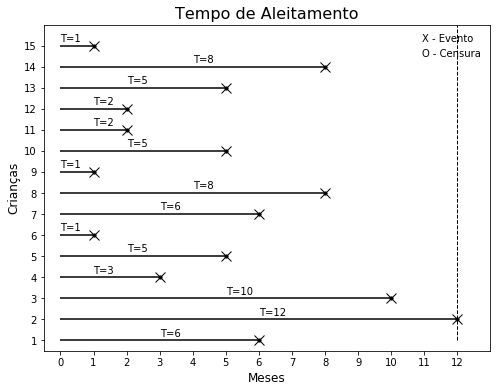

In [8]:
# Dados de sobrevivência
entry_individual = np.zeros(15, dtype=np.int)
actual_lifetimes = np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1])
censured = np.ones(15, dtype=np.int)
current_time = max(actual_lifetimes) + 1  #This variable defines the time window

# Função que gera gráfico de tempo de sobrevivência
linha_do_tempo (entry_individual, actual_lifetimes, current_time, censured, "Meses", "Crianças", "Tempo de Aleitamento", 8, 6)


<a id='E2.1.b'></a>
#### b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.

Indivíduo: 1, Trajetória de Sobrevivência: 6.


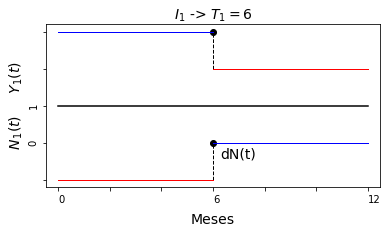

Indivíduo: 2, Trajetória de Sobrevivência: 12.


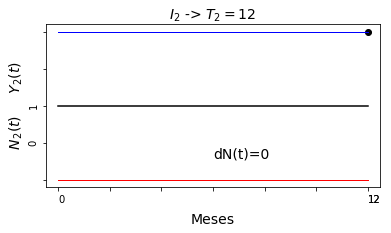

Indivíduo: 3, Trajetória de Sobrevivência: 10.


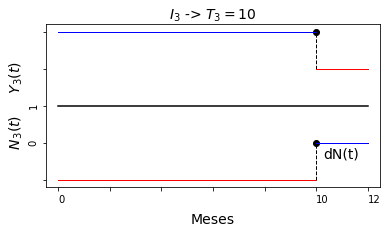

Indivíduo: 4, Trajetória de Sobrevivência: 3.


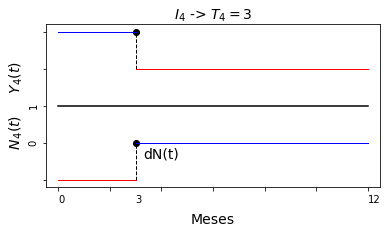

Indivíduo: 5, Trajetória de Sobrevivência: 5.


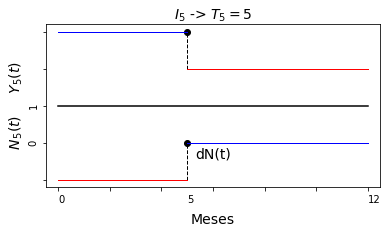

Indivíduo: 6, Trajetória de Sobrevivência: 1.


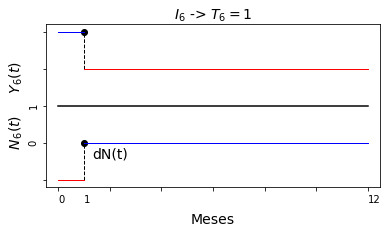

Indivíduo: 7, Trajetória de Sobrevivência: 6.


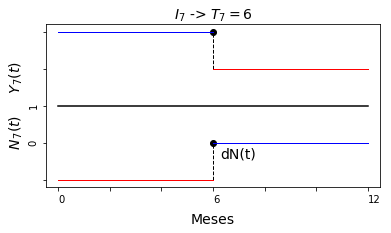

Indivíduo: 8, Trajetória de Sobrevivência: 8.


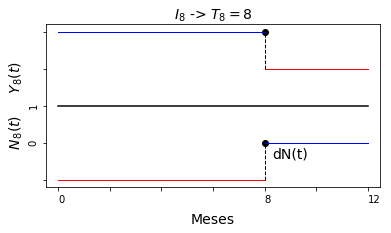

Indivíduo: 9, Trajetória de Sobrevivência: 1.


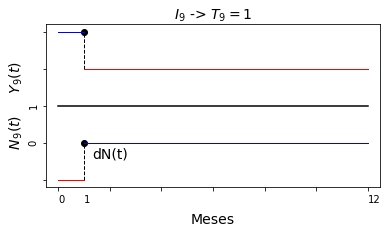

Indivíduo: 10, Trajetória de Sobrevivência: 5.


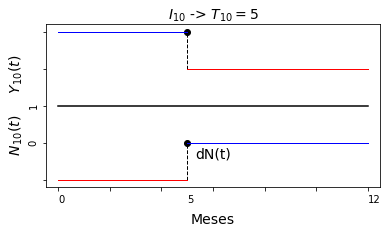

Indivíduo: 11, Trajetória de Sobrevivência: 2.


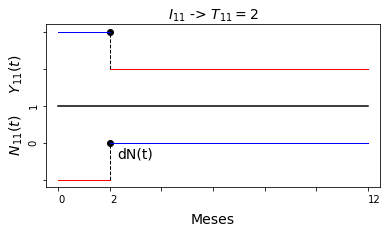

Indivíduo: 12, Trajetória de Sobrevivência: 2.


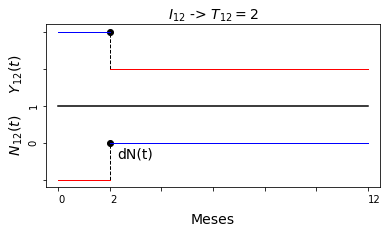

Indivíduo: 13, Trajetória de Sobrevivência: 5.


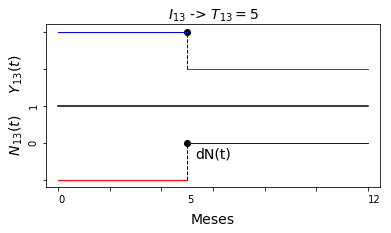

Indivíduo: 14, Trajetória de Sobrevivência: 8.


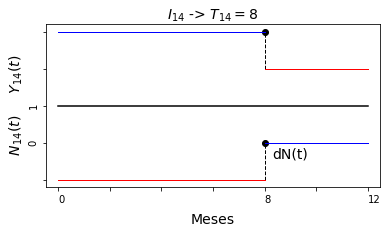

Indivíduo: 15, Trajetória de Sobrevivência: 1.


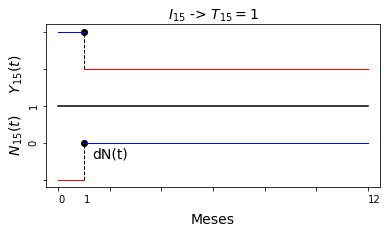

In [9]:
entry_individual = np.zeros(15, dtype=np.int)
actual_lifetimes = np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1])
censured = np.ones(15, dtype=np.int)

tragetoria(entry_individual, actual_lifetimes, censured, "Meses")


<a id='E2.1.c'></a>
#### c) Como você construiria um banco de dados para analisar estes dados pelo processo clássico?

In [459]:
df = pd.DataFrame(np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1]))
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Criança'})
df['Status'] = 1
df['Criança'] = df['Criança'] + 1
df

,Criança,Tempo,Status
0,1,6,1
1,2,12,1
2,3,10,1
3,4,3,1
4,5,5,1
5,6,1,1
6,7,6,1
7,8,8,1
8,9,1,1
9,10,5,1


<a id='E2.1.a'></a>
#### d)E pelo processo de contagem?

In [460]:
df = pd.DataFrame(np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1]))
df['Tempo Inicial'] = 0
df = df[['Tempo Inicial', 0]]
df = df.reset_index()
df = df.rename(columns={0: 'Tempo Final', 'index':'Criança'})
df['Status'] = 1
df['Criança'] = df['Criança'] + 1
df

,Criança,Tempo Inicial,Tempo Final,Status
0,1,0,6,1
1,2,0,12,1
2,3,0,10,1
3,4,0,3,1
4,5,0,5,1
5,6,0,1,1
6,7,0,6,1
7,8,0,8,1
8,9,0,1,1
9,10,0,5,1


## Exercício 2.2  <a id='Exercicio2.2'></a>

Considere agora o tempo de sobrevivência de 15 pacientes submetidos à hemodiálise. Neste caso, a variável de interesse  é  o  tempo  desde  a  primeira diálise até o óbito (em meses).

2, 4, 29+, 6+, 3, 1, 1, 2, 3, 9+, 10, 11, 5+, 5, 1

Os tempos censurados (censura a direita) estão indicados pelo sinal de +.

Considere  que todos os pacientes entraram juntos no início do estudo.

* [**a) Represente graficamente os tempos de observação dos pacientes, utilizando a notação clássica.**](#E2.2.a)
* [**b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.**](#E2.2.b)
* [**c) Construa um banco de dados para analisar esses dados pelo processo clássico.**](#E2.2.c)
* [**d) Reconstrua o banco de dados, na formas de processo de contagem, considerando que esta  é  uma  coorte  aberta  e  as  datas  de  início  de  observação  de  cada  paciente  são dadas na tabela abaixo**](#E2.2.d)


<a id='E2.2.a'></a>
#### a) Represente graficamente os tempos de observação dos pacientes, utilizando a notação clássica.

Tempo de vida observado: 
 [ 2  4 29  6  3  1  1  2  3  9 10 11  5  5  1] 



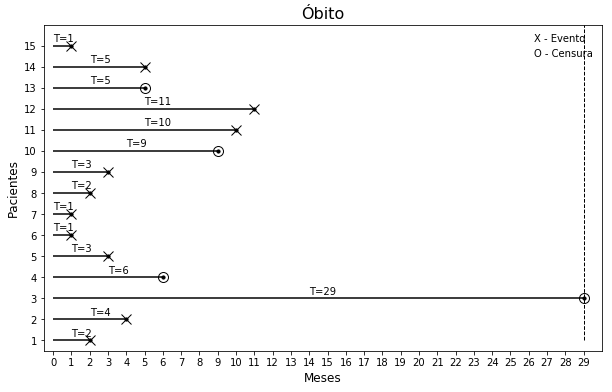

In [10]:
# Dados de sobrevivência
entry_individual = np.zeros(15, dtype=np.int)
actual_lifetimes = np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1])
censured = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
current_time = max(actual_lifetimes) + 1  #This variable defines the time window

# Função que gera gráfico de tempo de sobrevivência
linha_do_tempo (entry_individual, actual_lifetimes, current_time, censured, "Meses", "Pacientes", "Óbito", 10, 6)


<a id='E2.2.b'></a>
#### b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem..

Indivíduo: 1, Trajetória de Sobrevivência: 2.


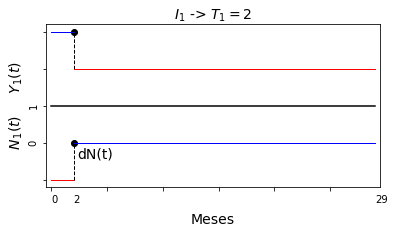

Indivíduo: 2, Trajetória de Sobrevivência: 4.


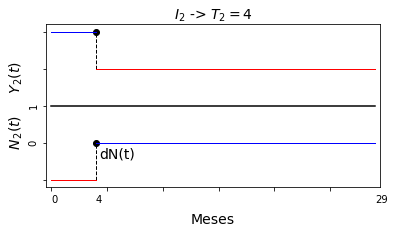

Indivíduo: 3, Trajetória de Sobrevivência: 29.


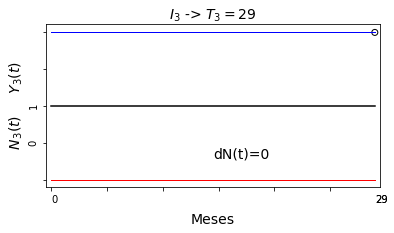

Indivíduo: 4, Trajetória de Sobrevivência: 6.


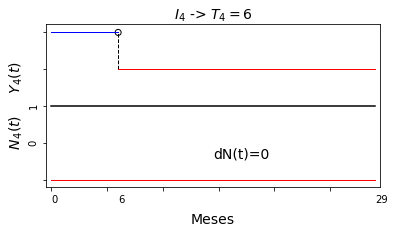

Indivíduo: 5, Trajetória de Sobrevivência: 3.


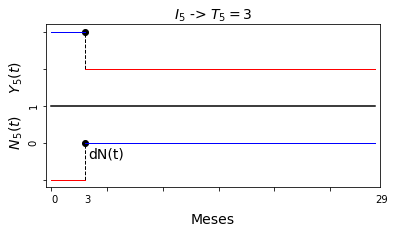

Indivíduo: 6, Trajetória de Sobrevivência: 1.


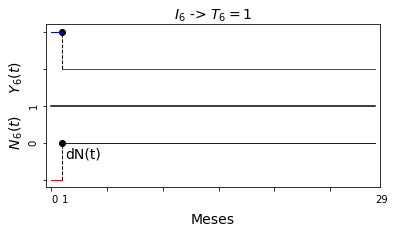

Indivíduo: 7, Trajetória de Sobrevivência: 1.


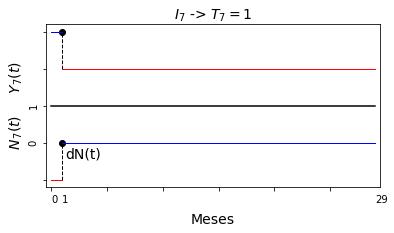

Indivíduo: 8, Trajetória de Sobrevivência: 2.


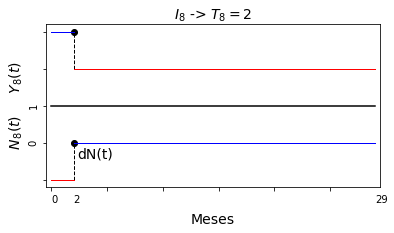

Indivíduo: 9, Trajetória de Sobrevivência: 3.


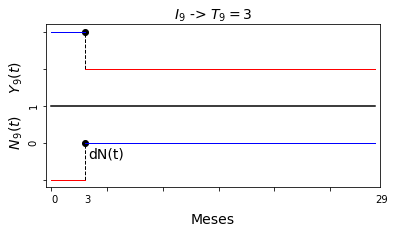

Indivíduo: 10, Trajetória de Sobrevivência: 9.


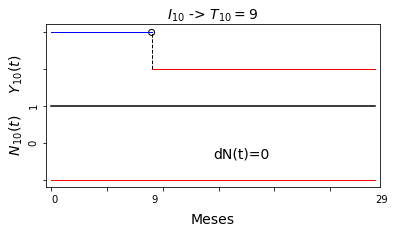

Indivíduo: 11, Trajetória de Sobrevivência: 10.


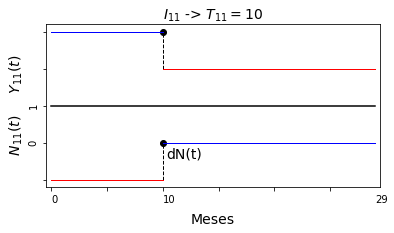

Indivíduo: 12, Trajetória de Sobrevivência: 11.


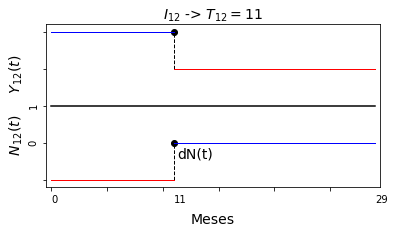

Indivíduo: 13, Trajetória de Sobrevivência: 5.


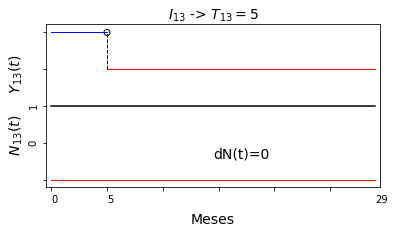

Indivíduo: 14, Trajetória de Sobrevivência: 5.


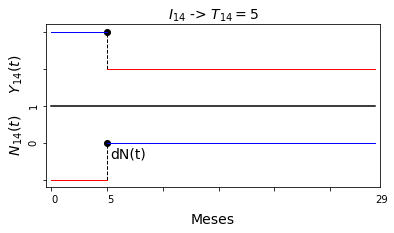

Indivíduo: 15, Trajetória de Sobrevivência: 1.


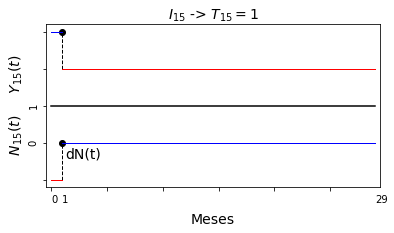

In [11]:
entry_individual = np.zeros(15, dtype=np.int)
actual_lifetimes = np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1])
censured = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])

tragetoria(entry_individual, actual_lifetimes, censured, "Meses")


<a id='E2.2.c'></a>
#### c) Construa um banco de dados para analisar esses dados pelo processo clássico.

In [482]:
df = pd.DataFrame(np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1]))
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Paciente'})
df['Status'] = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
df['Paciente'] = df['Paciente'] + 1
df

,Paciente,Tempo,Status
0,1,2,1
1,2,4,1
2,3,29,0
3,4,6,0
4,5,3,1
5,6,1,1
6,7,1,1
7,8,2,1
8,9,3,1
9,10,9,0


<a id='E2.2.d'></a>
#### d) Reconstrua o banco de dados, na formas de processo de contagem, considerando que esta  é  uma  coorte  aberta  e  as  datas  de  início  de  observação  de  cada  paciente  são dadas na tabela abaixo.

In [483]:
df = pd.DataFrame(np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1]))
df['Tempo Inicial'] = np.array([0, 1, 12, 3, 1, 7, 0, 1, 1, 3, 12, 4, 4, 1, 22])
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Paciente'})
df['Paciente'] = df['Paciente'] + 1
df['Tempo Final'] = df['Tempo Inicial'] + df['Tempo']
df['Status'] = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
df

,Paciente,Tempo,Tempo Inicial,Tempo Final,Status
0,1,2,0,2,1
1,2,4,1,5,1
2,3,29,12,41,0
3,4,6,3,9,0
4,5,3,1,4,1
5,6,1,7,8,1
6,7,1,0,1,1
7,8,2,1,3,1
8,9,3,1,4,1
9,10,9,3,12,0


## Exercício 2.3  <a id='Exercicio2.3'></a>

Suponha que, em um hospital, 6 pacientes HIV positivo são acompanhados ao longo  de  um  ano.

No  gráfico  abaixo,  as  linhas  horizontais  representam  o  tempo  de acompanhamento  de  cada  paciente. Represente,  utilizando  as variáveis N(t) e Y (t), as trajetórias de cada um dos 6 pacientes.


Tempo de vida observado: 
 [ 9  6  3 12  6  4] 



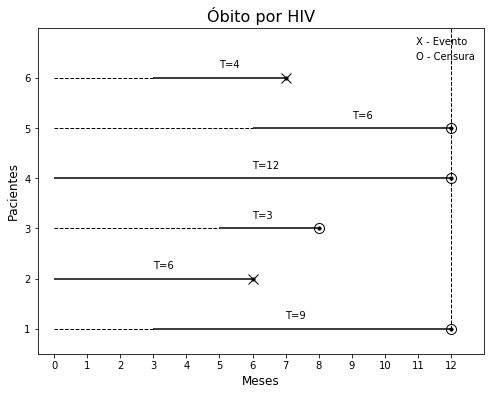

In [12]:
# Dados de sobrevivência
entry_individual = np.array([3,0,5,0,6,3])
actual_lifetimes = np.array([9,6,3,12,6,4])
censured = np.array([0,1,0,0,0,1])
current_time = max(actual_lifetimes) + 1  #This variable defines the time window

# Função que gera gráfico de tempo de sobrevivência
linha_do_tempo (entry_individual, actual_lifetimes, current_time, censured, "Meses", "Pacientes", "Óbito por HIV", 8, 6)

Indivíduo: 1, Trajetória de Sobrevivência: 9.


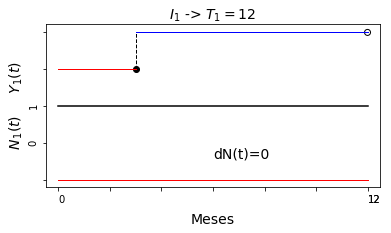

Indivíduo: 2, Trajetória de Sobrevivência: 6.


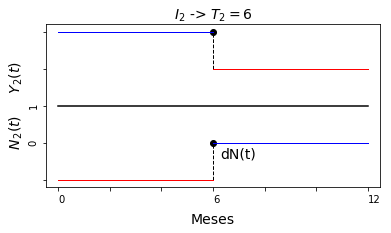

Indivíduo: 3, Trajetória de Sobrevivência: 3.


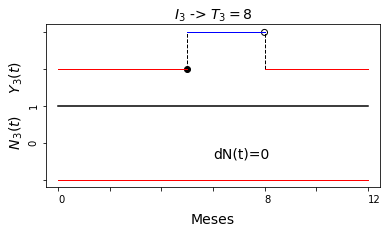

Indivíduo: 4, Trajetória de Sobrevivência: 12.


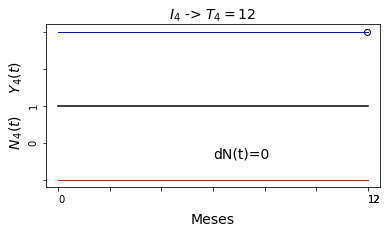

Indivíduo: 5, Trajetória de Sobrevivência: 6.


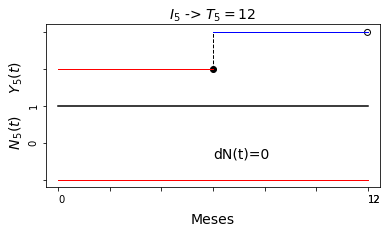

Indivíduo: 6, Trajetória de Sobrevivência: 4.


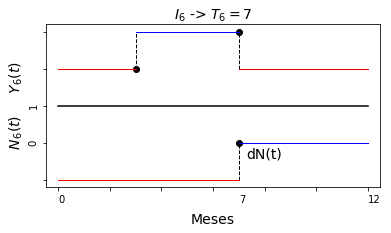

In [13]:
tragetoria(entry_individual, actual_lifetimes, censured, "Meses")